40542 180
425 180
614 180
790 180
346 180
32 180
369 180
23 180
09-Wilmington NCFinalStorm.png
10-Charleston SCFinalStorm.png
11-Fernandina BeachFinalStorm.png
12-Key WestFinalStorm.png


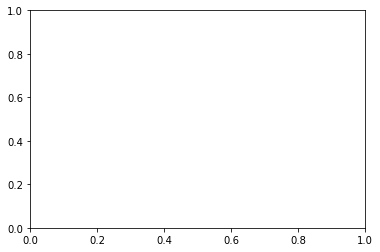

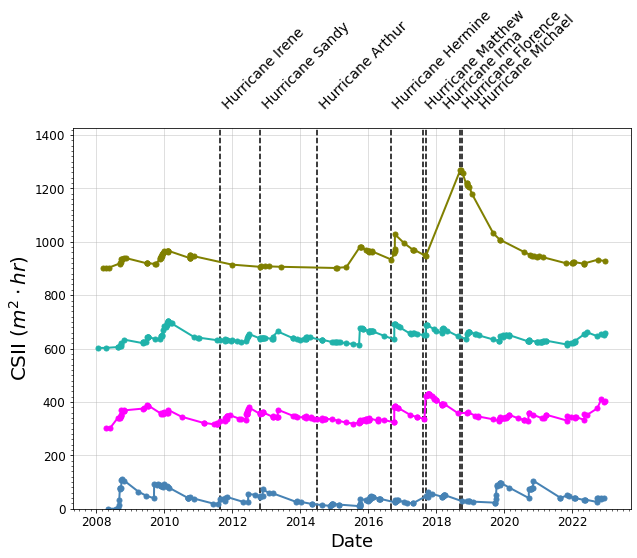

In [3]:
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil import parser
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
from dateutil.relativedelta import relativedelta


# Set the start and end years for the x-axis
startYear = 2008
endYear = 2022

# Make plots for all stations with a single delta value
delta = 0.3
delta_str = str(delta).replace('.', '-')

# Set the path to the directory containing the CSV files
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
dir_path = os.path.join(parent_dir, 'Final_Storm_Results')

# Get a list of CSV files in the Final_Storm_Results directory
file_list = os.listdir(dir_path)
csv_files = [filename for filename in file_list if filename.endswith('.csv')]

# Create the output filename based on the current date and time
now = datetime.now()
date_string = now.strftime("%Y-%m-%d")
output_filename = f"{date_string}_dates_compare_South_{startYear}_{endYear}_delta_{delta_str}"

#colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'deeppink', 'gray', 'olive', 'lightseagreen', 'magenta', 'steelblue']
colors = ['olive', 'lightseagreen', 'magenta', 'steelblue']

# Define dates and labels of hurricanes (tropical storms)
hurricanes = [
    (datetime(2011, 8, 26), 'Hurricane Irene'),
    (datetime(2012, 10, 24), 'Hurricane Sandy'),
    (datetime(2014, 6, 30), 'Hurricane Arthur'),
    (datetime(2016, 8, 28), 'Hurricane Hermine'),
    (datetime(2017, 8, 9), 'Hurricane Matthew'),
    (datetime(2017, 9, 10), 'Hurricane Irma'),
    (datetime(2018, 9, 14), 'Hurricane Florence'),
    (datetime(2018, 10, 7), 'Hurricane Michael')
]
# Create a list to store the dataframes
dfs = []

i = 0
csv_files = sorted (csv_files)
southern_stations = csv_files[8:]

# Plot southern stations on a single plot
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 7))

t0 = datetime(1900, 8, 26)
time_int = relativedelta(days=6*30)      # Adjust
# Add vertical lines at the specified dates and labels
for hurricane_date, label in hurricanes:
    dt = hurricane_date - t0
    t0 = hurricane_date
    print(dt.days, time_int.days)
    ax.axvline(x=hurricane_date, color='black', linestyle='--')
    ax.annotate(
        label,  # The text of the label
        xy=(hurricane_date, ax.get_ylim()[1]),  # Position of the label
        xytext=(15, 400) if dt.days < time_int.days else (0, 400),  # Offset of the label from the point
        textcoords='offset points',
        rotation=45,  # Rotate the label by 45 degrees
        fontsize=14,  # Font size of the label
        color='black'  # Color of the label
    )


for filename in southern_stations:
    if filename.endswith(".csv"):
        filepath = os.path.join(dir_path, filename)
        plotname = os.path.splitext(filename)[0] + ".png"
        print(plotname)
        with open(filepath) as f:
            reader = csv.reader(f)
            next(reader)  # skip the header row
            dates = []
            sepi = []
            tp = []

            for row in reader:
                date = parser.parse(row[0]).date()
                sepi_val = float(row[1])
                tp_val = float(row[2])
                if startYear <= date.year <= endYear:
                    dates.append(date)
                    sepi.append(sepi_val)
                    tp.append(tp_val)
                
        tau_p = [t / 365 for t in tp]
        csii = [sepi[0]]
        for j in range(1, len(sepi)):
            csii_val = sepi[j] + csii[j-1] * delta ** tau_p[j]
            csii.append(csii_val)

        ax.plot(dates, [x + 900 - i * 300 for x in csii], label=os.path.splitext(os.path.basename(filepath))[0], marker='o', markersize = 5, color=colors[i % len(colors)], linewidth = 2)
        i += 1

# Set the axis labels, limits, and ticks
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("CSII ($m^2 \cdot hr$)", fontsize=20)
ax.grid(True, which='major', axis='both', alpha=0.5, linestyle='-')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(20))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#ax.set_xlim([datetime(1970, 1, 1), datetime(1979, 12, 31)])
ax.set_ylim([0, 1425])

# Save the plot to a file
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

